<a href="https://colab.research.google.com/github/clustering-jun/GNU-MachineLearning/blob/main/L11-1_%EB%AA%A8%EB%8D%B8_%ED%8F%89%EA%B0%80_%EB%B0%8F_%EA%B5%90%EC%B0%A8_%EA%B2%80%EC%A6%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **간단한 K-겹 교차 검증 예시**

In [8]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

iris = datasets.load_iris()
features = iris.data
target = iris.target

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

model1 = LogisticRegression(random_state=0)

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

Kflod_res = cross_val_score(model1,
                            features_std, target,
                            cv = kfold, scoring = 'accuracy',
                            n_jobs = -1)

print('교차 검증별 정확도:', np.round(Kflod_res, 3))
print('평균 검증 정확도:', np.round(np.mean(Kflod_res), 3))

교차 검증별 정확도: [1.    0.9   1.    1.    0.933]
평균 검증 정확도: 0.967


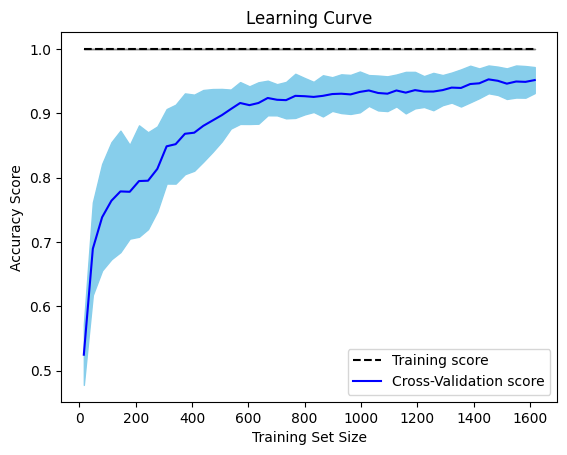

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

digits = datasets.load_digits()
features = digits.data
target = digits.target

scaler = MinMaxScaler()
features_standardized = scaler.fit_transform(features)

model = RandomForestClassifier()

train_sizes, train_scores, test_scores = learning_curve(model,
                                                        features_standardized,
                                                        target,
                                                        cv = 10,
                                                        scoring = "accuracy",
                                                        n_jobs = -1,
                                                        train_sizes = np.linspace(0.01, 1, 50))

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)

test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, "--", color = "black",
         label = "Training score")
plt.plot(train_sizes, test_mean, color = "blue",
         label = "Cross-Validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color = "gray")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color = "Skyblue")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc = "best")
plt.show()

### **연습 문제**
- 아래의 코드를 참고하여 Survived에 대해 예측하는 분류 모델을 평가하고 교차 검증을 수행하세요.

In [15]:
import pandas as pd

titanic = pd.read_csv('titanic.csv')
titanic = titanic.dropna()

features = titanic[['Pclass', 'Sex', 'Age', 'Fare']]
target = titanic['Survived']

Sex_mapping = {'male': 0, 'female':1}
features['Sex'] = features['Sex'].replace(Sex_mapping)

/tmp/ipython-input-3465484389.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features['Sex'] = features['Sex'].replace(Sex_mapping)
/tmp/ipython-input-3465484389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Sex'] = features['Sex'].replace(Sex_mapping)


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

scaler = StandardScaler()
features_std = scaler.fit_transform(features)

model = RandomForestClassifier(random_state=0)

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

Kflod_res = cross_val_score(model,
                            features_std, target,
                            cv = kfold, scoring = 'accuracy',
                            n_jobs = -1)

print('교차 검증별 정확도:', np.round(Kflod_res, 3))
print('평균 검증 정확도:', np.round(np.mean(Kflod_res), 3))

교차 검증별 정확도: [0.865 0.784 0.811 0.722 0.778]
평균 검증 정확도: 0.792
